# AIM-AHEAD PRIME Group 2 Data Analysis 
Three publicly available datasets from the CDC will be imported, wrangled, and visualized: 
* [Disability and Health Data System (DHDS) - Prevalence of Disability Status and Types by Demographic Groups, 2020](https://data.cdc.gov/Disability-Health/DHDS-Prevalence-of-Disability-Status-and-Types-by-/qjg3-6acf) 
* [United States COVID-19 Cases and Deaths by State over Time - ARCHIVED](https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36)
* [Household Pulse Survey (HPS): COVID-19 Vaccination among People with Disabilities](https://data.cdc.gov/Vaccinations/Household-Pulse-Survey-HPS-COVID-19-Vaccination-am/muep-c3qd)

## Data Import 
### DHDS - Prevalence of Disability Status and Types by Demographic Groups, 2020
Disability and Health Data System (DHDS) is an online source of state-level data on adults with disabilities. Users can access information on six functional disability types: cognitive (serious difficulty concentrating, remembering or making decisions), hearing (serious difficulty hearing or deaf), mobility (serious difficulty walking or climbing stairs), vision (serious difficulty seeing), self-care (difficulty dressing or bathing) and independent living (difficulty doing errands alone).

In [108]:
#import pandas as pd
import numpy as np
 
# import csv as a dataframe
#dhds_df = pd.read_csv("datasets/DHDS_-_Prevalence_of_Disability_Status_and_Types_by_Demographic_Groups__2020.csv")
#dhds_df.head(5)

### United States COVID-19 Cases and Deaths by State over Time - ARCHIVED
This dataset contains archived aggregate daily counts of COVID-19 cases and death by state. Although these data will continue to be publicly available, as of 10/20/2022, this dataset will no longer be updated.

In [3]:
# import csv as a dataframe
cdc_covid19_df = pd.read_csv("datasets/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv")
cdc_covid19_df.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


### Household Pulse Survey (HPS): COVID-19 Vaccination among People with Disabilities
Household Pulse Survey (HPS): HPS is a rapid-response survey of adults ages ≥18 years led by the U.S. Census Bureau, in partnership with seven other federal statistical agencies, to measure household experiences during the COVID-19 pandemic.

In [4]:
# import csv as a dataframe
cdc_covid19_vac_df = pd.read_csv("datasets/Household_Pulse_Survey__HPS___COVID-19_Vaccination_among_People_with_Disabilities.csv")
cdc_covid19_vac_df.head(5)

,Data Collection Period,Disability Type,Disability Status,Demographic Category,Demographic,Vaccination Status and Intent,Estimate (%),95% CI (%),Sample Size,Suppression Flag
0,"April 27, 2022 -June 13, 2022",Any Disability,With disability,All Adults,>=18,Vaccinated,83.3,81.9% to 84.5%,13907,0
1,"April 27, 2022 -June 13, 2022",Any Disability,With disability,Age,18-49,Vaccinated,78.5,76.3% to 80.6%,4698,0
2,"April 27, 2022 -June 13, 2022",Any Disability,With disability,Age,50-64,Vaccinated,85.1,82.8% to 87.1%,4421,0
3,"April 27, 2022 -June 13, 2022",Any Disability,With disability,Age,All Adults,Vaccinated,83.3,81.9% to 84.5%,13907,0
4,"April 27, 2022 -June 13, 2022",Any Disability,With disability,Age,>=65,Vaccinated,89.2,86.2% to 91.7%,4788,0


## Data Cleaning
### DHDS - Prevalence of Disability Status and Types by Demographic Groups, 2020
#### Filtering Data
Find only the visually impaired respondents by filtering the dataset to `'StratificationID1' == 'VISDIS'`. After filtering, `n = 896`.

In [5]:
# filter the dataset
dhds_df = dhds_df[(dhds_df["StratificationID1"] == 'VISDIS')]
dhds_df.head(5)

,Year,LocationAbbr,LocationDesc,DataSource,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,Data_Value,...,Stratification2,CategoryID,IndicatorID,LocationID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
3,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,4.2,...,NaN,DISEST,VETIND,23,VET2,AGEADJPREV,DISTYPE,VISDIS,NaN,NaN
4,2020,MI,Michigan,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,3.4,...,NaN,DISEST,VETIND,26,VET2,AGEADJPREV,DISTYPE,VISDIS,NaN,NaN
16,2020,LA,Louisiana,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Veteran,%,Age-adjusted Prevalence,NaN,...,NaN,DISEST,VETIND,22,VET1,AGEADJPREV,DISTYPE,VISDIS,NaN,NaN
20,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,4.5,...,NaN,DISEST,VETIND,39,VET2,AGEADJPREV,DISTYPE,VISDIS,NaN,NaN
24,2020,MD,Maryland,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,3.3,...,NaN,DISEST,VETIND,24,VET2,AGEADJPREV,DISTYPE,VISDIS,NaN,NaN


#### Remove Superfluous Columns
These columns will be removed:
* `StratificationCategoryID2`	
* `StratificationID2`
* `Stratification2`
* `StratificationCategory2`
* `CategoryID`	
* `IndicatorID`	
* `LocationID`	
* `ResponseID`	
* `DataValueTypeID`	
* `StratificationCategoryID1`	
* `StratificationID1`
* `Data_Value_Footnote_Symbol`
* `Data_Value_Footnote`
* `Data_Value_Alt`
* `StratificationCategory1`	
* `Stratification1`

In [6]:
# drop the unneeded columns
dhds_df = dhds_df.drop(columns=["StratificationCategoryID2", "StratificationID2", "Stratification2", "StratificationCategory2"])
dhds_df = dhds_df.drop(columns=["CategoryID", "IndicatorID", "LocationID", "ResponseID", "DataValueTypeID", "StratificationCategoryID1", "StratificationID1"])
dhds_df = dhds_df.drop(columns=["Data_Value_Footnote_Symbol", "Data_Value_Footnote"])
dhds_df = dhds_df.drop(columns=["Data_Value_Alt", "StratificationCategory1", "Stratification1"])
dhds_df[dhds_df["LocationAbbr"] == "OH"].head(5)

,Year,LocationAbbr,LocationDesc,DataSource,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Number,WeightedNumber
20,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,4.5,4.0,5.2,646.0,368446.0
118,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Female,%,Age-adjusted Prevalence,4.3,3.7,5.1,416.0,208072.0
904,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Hispanic,%,Age-adjusted Prevalence,8.8,5.3,14.2,24.0,29050.0
969,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,45-64,%,Prevalence,4.6,3.9,5.5,278.0,132639.0
2113,2020,OH,Ohio,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,"Native Hawaiian or Other Pacific Islander, non...",%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,NaN


### United States COVID-19 Cases and Deaths by State over Time - ARCHIVED
#### Filtering Data
To reflect the most recent data, the dataset will be filtered to include only the last day that the data was collected: `['submission_date'] == '10/18/2022'`. After filtering, `n = 60`.

In [7]:
# filter the dataset
cdc_covid19_df = cdc_covid19_df.loc[cdc_covid19_df['submission_date'] == '10/18/2022']
cdc_covid19_df.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
295,10/18/2022,IA,861010,NaN,NaN,844,0.0,10152,NaN,NaN,27,27.0,10/19/2022 01:15:24 PM,Not agree,Not agree
366,10/18/2022,NY,3275131,NaN,NaN,1660,0.0,29356,NaN,NaN,32,0.0,10/19/2022 01:15:24 PM,Not agree,Not agree
390,10/18/2022,NM,623179,NaN,NaN,266,0.0,8601,NaN,NaN,0,0.0,10/19/2022 01:15:24 PM,NaN,Not agree
683,10/18/2022,FL,7145833,NaN,NaN,1661,660.0,82065,NaN,NaN,0,0.0,10/18/2022 12:00:00 AM,Not agree,Not agree
4666,10/18/2022,MP,13202,13202.0,0.0,0,0.0,41,41.0,0.0,0,0.0,10/19/2022 01:15:24 PM,Agree,Agree


#### Remove Superfluous Columns
These columns will be removed:
* `conf_cases`
* `prob_cases`	
* `new_case`
* `pnew_case`
* `conf_death`
* `prob_death`	
* `new_death`
* `pnew_death`
* `created_at`	
* `consent_cases`
* `consent_deaths`

In [8]:
# drop the unneeded columns
cdc_covid19_df = cdc_covid19_df.drop(columns=["conf_cases", "prob_cases", "new_case", "pnew_case", "conf_death", "prob_death", "new_death", "pnew_death", "created_at", "consent_cases", "consent_deaths"])
cdc_covid19_df.head(5)

,submission_date,state,tot_cases,tot_death
295,10/18/2022,IA,861010,10152
366,10/18/2022,NY,3275131,29356
390,10/18/2022,NM,623179,8601
683,10/18/2022,FL,7145833,82065
4666,10/18/2022,MP,13202,41


### Household Pulse Survey (HPS): COVID-19 Vaccination among People with Disabilities
#### Data Filtering
This dataset will be filtered on the `Disability Type`, `Disability Status`, and `Suppression Flag` columns: `'Disability Type' == 'Seeing' & 'Disability Status' == 'With disability' & 'Suppression Flag' == 0`. After filtering, `n = 20`. 

In [9]:
# filter the dataset
cdc_covid19_vac_df = cdc_covid19_vac_df.loc[(cdc_covid19_vac_df['Disability Type'] == 'Seeing') & (cdc_covid19_vac_df['Disability Status'] == 'With disability') & (cdc_covid19_vac_df['Suppression Flag'] == 0)]
cdc_covid19_vac_df.head(5)


,Data Collection Period,Disability Type,Disability Status,Demographic Category,Demographic,Vaccination Status and Intent,Estimate (%),95% CI (%),Sample Size,Suppression Flag
28,"April 27, 2022 -June 13, 2022",Seeing,With disability,All Adults,>=18,Vaccinated,77.5,74.1% to 80.6%,3349,0
121,"August 18 - September 13, 2021",Seeing,With disability,All Adults,>=18,Vaccinated,78.0,75.1% to 80.8%,3434,0
215,"August 4 - August 30, 2021",Seeing,With disability,All Adults,>=18,Vaccinated,79.0,76.1% to 81.6%,3482,0
309,"December 1, 2021 - January 10, 2022",Seeing,With disability,All Adults,>=18,Vaccinated,83.5,81.1% to 85.7%,3769,0
404,"December 29,2021-February 7, 2022",Seeing,With disability,All Adults,>=18,Vaccinated,82.1,79.6% to 84.3%,4139,0


#### Remove Superfluous Columns
These columns will be removed:
* `Disability Type`	
* `Disability Status`
* `Suppression Flag`

In [10]:
# drop the unneeded columns
cdc_covid19_vac_df = cdc_covid19_vac_df.drop(columns=["Disability Type", "Disability Status", "Suppression Flag"])
cdc_covid19_vac_df.head(5)

,Data Collection Period,Demographic Category,Demographic,Vaccination Status and Intent,Estimate (%),95% CI (%),Sample Size
28,"April 27, 2022 -June 13, 2022",All Adults,>=18,Vaccinated,77.5,74.1% to 80.6%,3349
121,"August 18 - September 13, 2021",All Adults,>=18,Vaccinated,78.0,75.1% to 80.8%,3434
215,"August 4 - August 30, 2021",All Adults,>=18,Vaccinated,79.0,76.1% to 81.6%,3482
309,"December 1, 2021 - January 10, 2022",All Adults,>=18,Vaccinated,83.5,81.1% to 85.7%,3769
404,"December 29,2021-February 7, 2022",All Adults,>=18,Vaccinated,82.1,79.6% to 84.3%,4139


## Data Visualization
Join the DHDS - Prevalence of Disability Status and Types by Demographic Groups, 2020 and United States COVID-19 Cases and Deaths by State over Time - ARCHIVED datsets by abbreviated state, e.g., 'OH':
* Prevalence of Disability Status and Types by Demographic Groups, 2020: `LocationAbbr`
* United States COVID-19 Cases and Deaths by State over Time - ARCHIVED: `state`

After joining the datasets, `n = 742`.

### Joining Datasets

In [12]:
# join the datasets
joined_dhds_cdc_covid19_df = dhds_df.merge(cdc_covid19_df, left_on="LocationAbbr", right_on="state")
joined_dhds_cdc_covid19_df.head(5)

,Year,LocationAbbr,LocationDesc,DataSource,Category,Indicator,Response,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Number,WeightedNumber,submission_date,state,tot_cases,tot_death
0,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Non-Veteran,%,Age-adjusted Prevalence,4.2,3.6,5.0,483.0,42424.0,10/18/2022,ME,294927,2629
1,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Female,%,Age-adjusted Prevalence,4.6,3.7,5.6,346.0,27365.0,10/18/2022,ME,294927,2629
2,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,18-44,%,Prevalence,3.2,2.3,4.4,63.0,12962.0,10/18/2022,ME,294927,2629
3,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,"Other / Multirace, non-Hispanic",%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,NaN,10/18/2022,ME,294927,2629
4,2020,ME,Maine,BRFSS,Disability Estimates,Disability status and types among adults 18 ye...,Hispanic,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,NaN,10/18/2022,ME,294927,2629


### Further Data Cleaning
These columns will be removed from the joined dataset:
* `submission_date`
* `state`
* `DataSource`	
* `Category`	
* `Indicator`
* `Data_Value_Unit`
* `Number`
* `Year`

In [58]:
# remove unwanted columns
#joined_dhds_cdc_covid19_df = joined_dhds_cdc_covid19_df.drop(columns=["submission_date", "state", "DataSource", "Category", "Indicator", "Data_Value_Unit", "Number", "Year"])
joined_dhds_cdc_covid19_df.head(5)
#joined_dhds_cdc_covid19_df.Response.unique()

,LocationAbbr,LocationDesc,Response,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,WeightedNumber,tot_cases,tot_death
0,ME,Maine,Non-Veteran,Age-adjusted Prevalence,4.2,3.6,5.0,42424.0,294927,2629
1,ME,Maine,Female,Age-adjusted Prevalence,4.6,3.7,5.6,27365.0,294927,2629
2,ME,Maine,18-44,Prevalence,3.2,2.3,4.4,12962.0,294927,2629
3,ME,Maine,"Other / Multirace, non-Hispanic",Age-adjusted Prevalence,NaN,NaN,NaN,NaN,294927,2629
4,ME,Maine,Hispanic,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,294927,2629


### Creating Dataframe Plots
The dataframe plots that will be created are:
1. Estimated number of visually impaired per U.S. state.
2. Total number of COVID-19 cases per U.S. state.
3. Total number of COVID-19 deaths per U.S. state.
4. Vaccination status of the visually impaired in the U.S.
5. Demographics of the visually impaired in the U.S. (categorized by age, race, and veteran status).

### Estimated Number of Visually Impaired People per U.S. State (as of 19 May 2022)

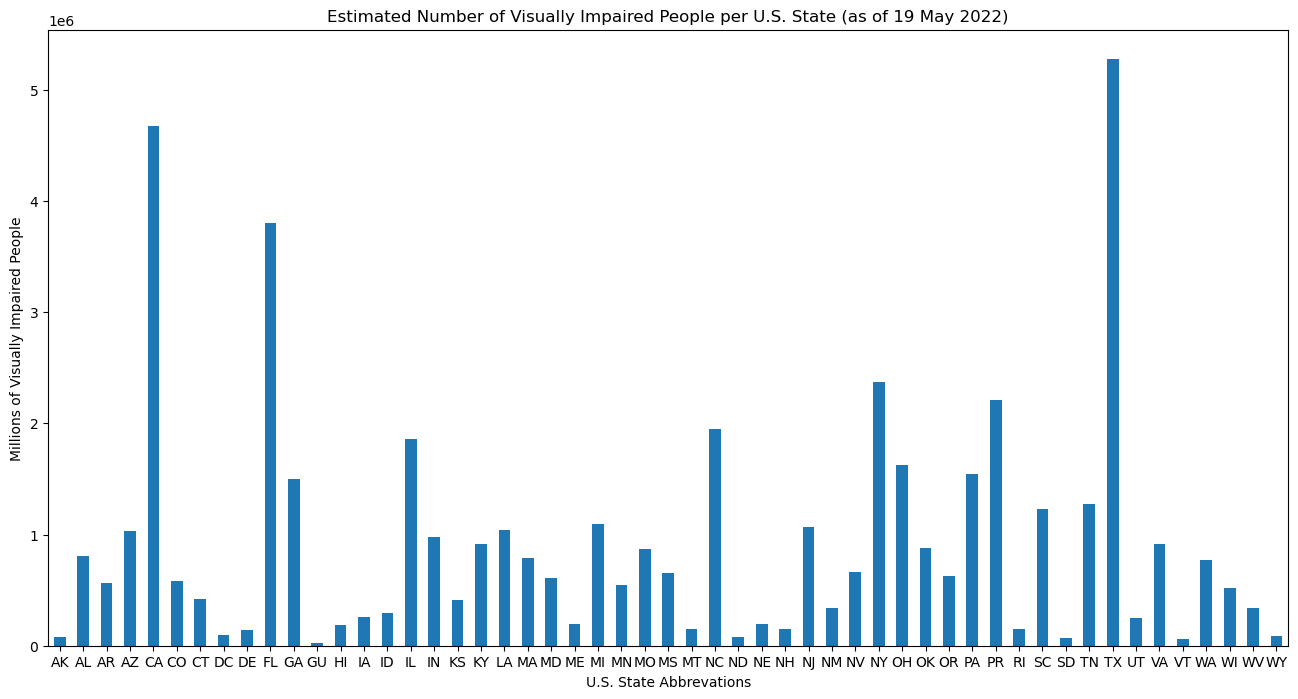

In [115]:
# Create the first plot
joined_dhds_cdc_covid19_df.groupby(["LocationAbbr"])["WeightedNumber"].sum().plot(kind="bar", figsize=(16,8), title="Estimated Number of Visually Impaired People per U.S. State (as of 19 May 2022)", xlabel="U.S. State Abbrevations", ylabel="Millions of Visually Impaired People").set_xticks(range(0, joined_dhds_cdc_covid19_df.LocationAbbr.unique().size), np.sort(joined_dhds_cdc_covid19_df.LocationAbbr.unique().tolist(), axis = 0), rotation='horizontal')

### Total Number of COVID-19 Cases per U.S. State (as of 19 October 2022)

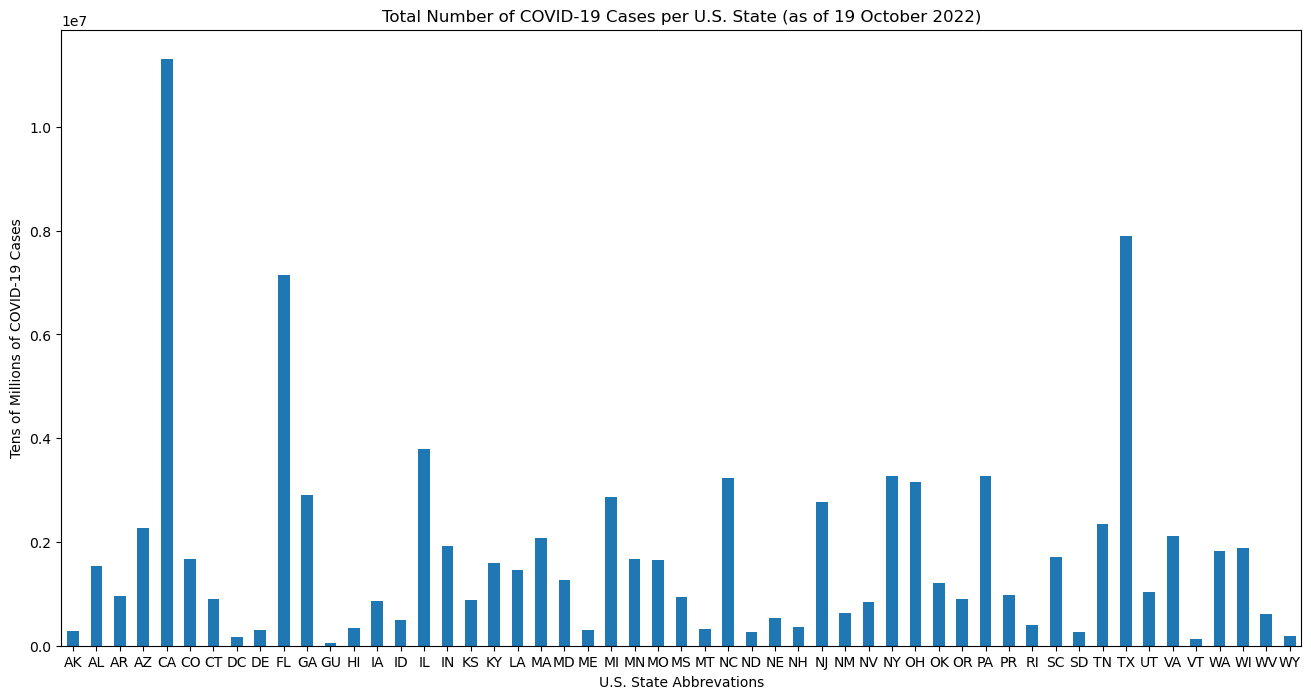

In [120]:
# Create the second plot
joined_dhds_cdc_covid19_df.groupby(["LocationAbbr"])["tot_cases"].first().plot(kind="bar", figsize=(16,8), title="Total Number of COVID-19 Cases per U.S. State (as of 19 October 2022)", xlabel="U.S. State Abbrevations", ylabel="Tens of Millions of COVID-19 Cases").set_xticks(range(0, joined_dhds_cdc_covid19_df.LocationAbbr.unique().size), np.sort(joined_dhds_cdc_covid19_df.LocationAbbr.unique().tolist(), axis = 0), rotation='horizontal')

### Total Number of COVID-19 Deaths per U.S. State (as of 19 October 2022)

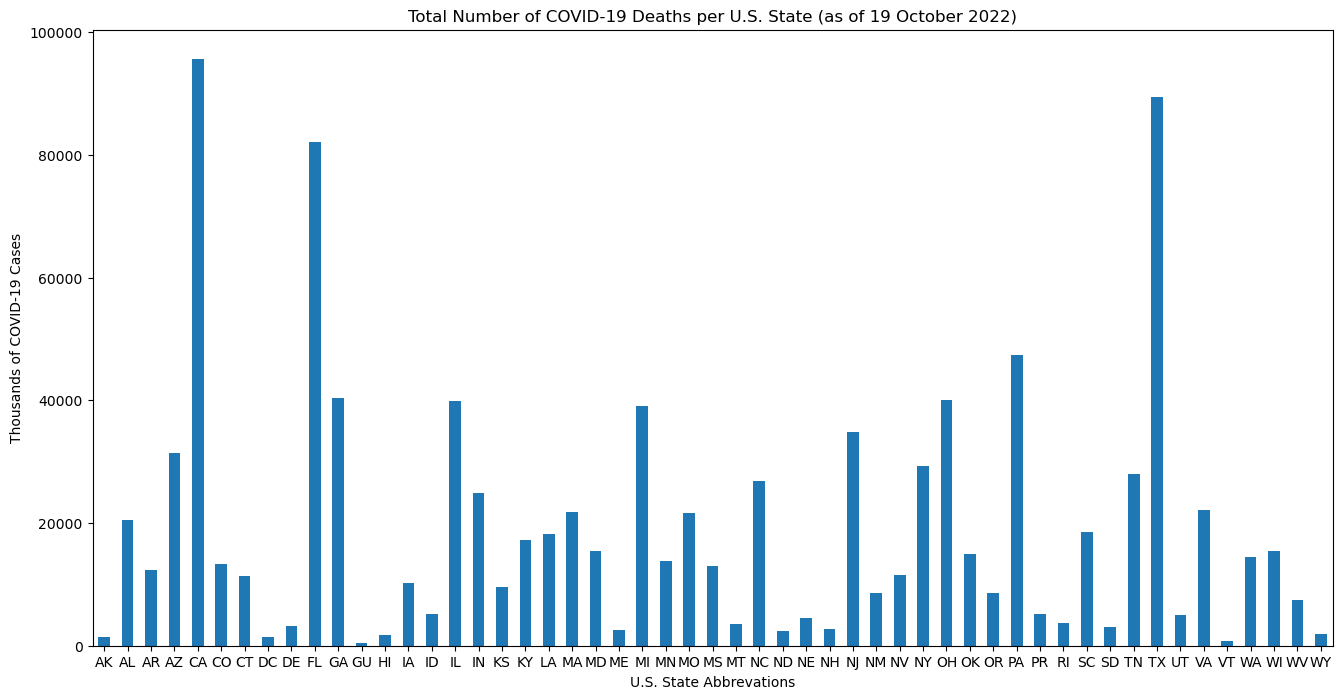

In [122]:
# Create the third plot
joined_dhds_cdc_covid19_df.groupby(["LocationAbbr"])["tot_death"].first().plot(kind="bar", figsize=(16,8), title="Total Number of COVID-19 Deaths per U.S. State (as of 19 October 2022)", xlabel="U.S. State Abbrevations", ylabel="Thousands of COVID-19 Cases").set_xticks(range(0, joined_dhds_cdc_covid19_df.LocationAbbr.unique().size), np.sort(joined_dhds_cdc_covid19_df.LocationAbbr.unique().tolist(), axis = 0), rotation='horizontal')

### Vaccination Status of the Visually Impaired in the U.S. (as of 20 December 2022)

<AxesSubplot: title={'center': 'Vaccination Status of the Visually Impaired in the U.S. (as of 20 December 2022)'}, xlabel='Vaccination Status', ylabel='Percentage'>

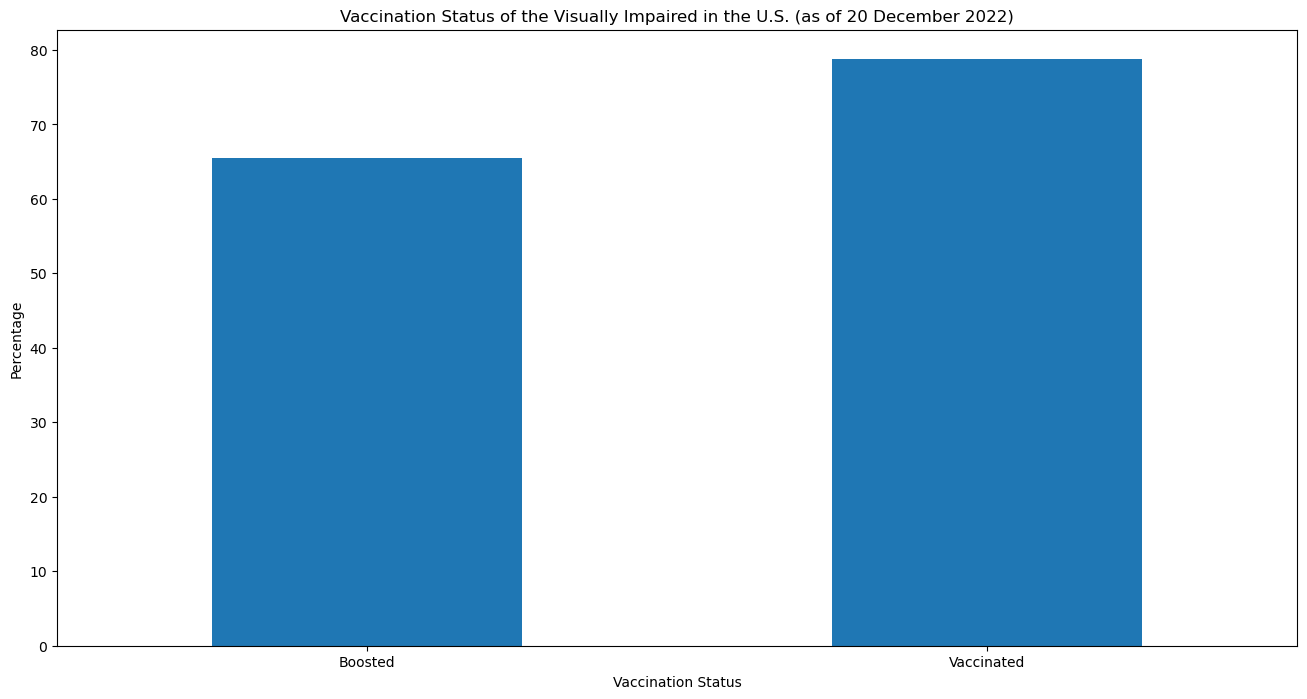

In [148]:
# create the fourth plot
#cdc_covid19_vac_df.head(5)
#cdc_covid19_vac_df[cdc_covid19_vac_df["Data Collection Period"] == 'October 5, 2022 -November 14, 2022'].head(5)
cdc_covid19_vac_df.groupby(["Vaccination Status and Intent"])["Estimate (%)"].mean().plot(kind="bar", figsize=(16,8), title="Vaccination Status of the Visually Impaired in the U.S. (as of 20 December 2022)", xlabel="Vaccination Status", ylabel="Percentage", rot=0)

### Demographics of the Visually Impaired in the U.S. (categorized by age, race, and veteran status) (as of 19 May 2022)

<AxesSubplot: title={'center': 'Demographics of the Visually Impaired in the U.S. (as of 19 May 2022)'}, xlabel='Demographic Categories', ylabel='Tens of Millions of Visually Impaired People'>

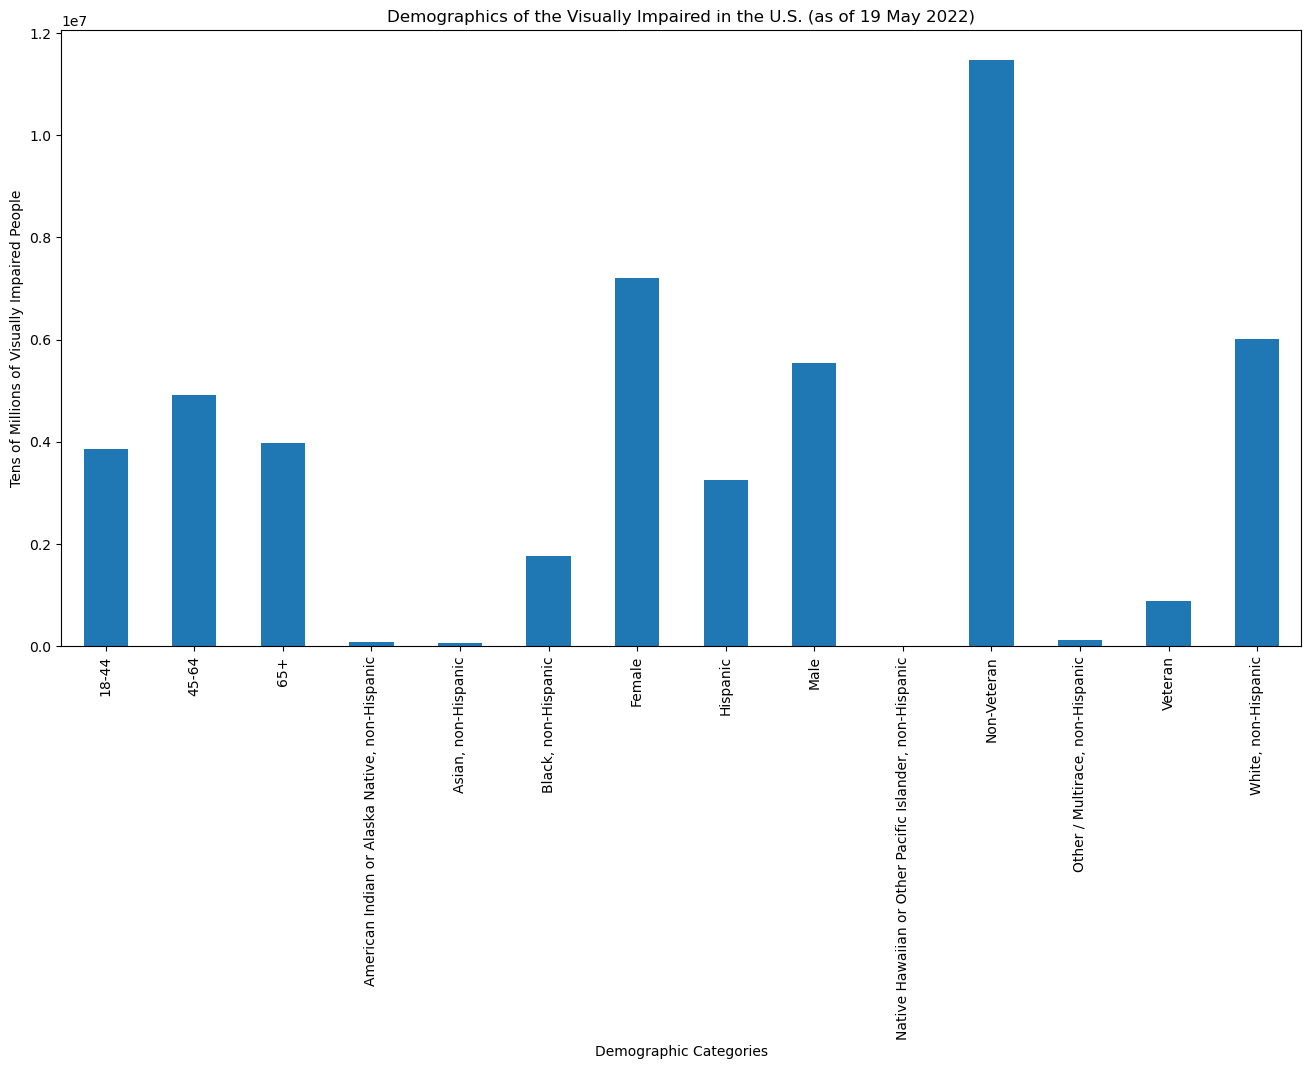

In [164]:
# Create the first plot
joined_dhds_cdc_covid19_df.groupby(["Response"])["WeightedNumber"].sum().plot(kind="bar", figsize=(16,8), title="Demographics of the Visually Impaired in the U.S. (as of 19 May 2022)", xlabel="Demographic Categories", ylabel="Tens of Millions of Visually Impaired People")